# K-Means

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

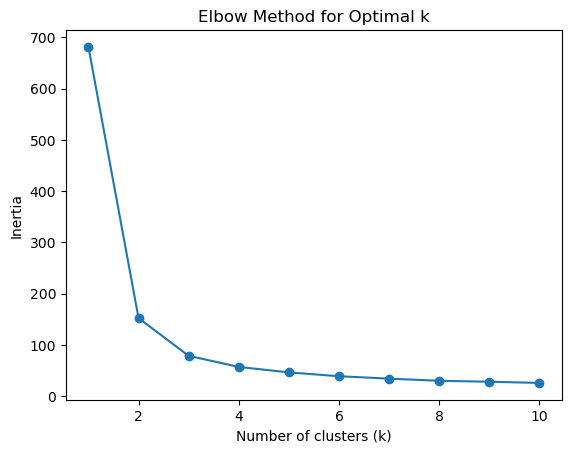

C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [29]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Based on the elbow curve, let's say the optimal number of clusters is 3
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data)

# Add the labels to the original dataset
data['cluster'] = labels

# Display the clustered dataset
print(data.head())


# KNN

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
k = 3  # Set the value of k
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


# Confusion Matrix

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


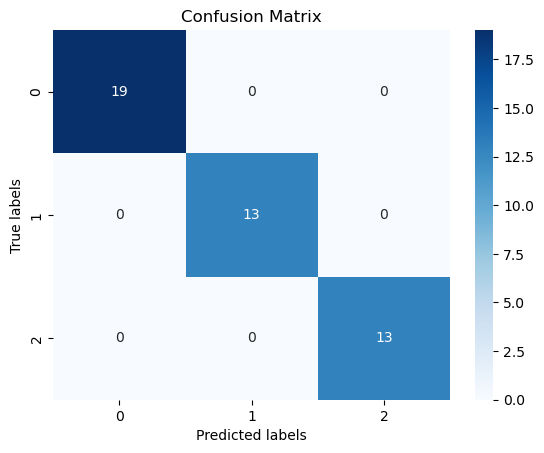

In [27]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load the iris dataset (you can replace this with your dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# PCA

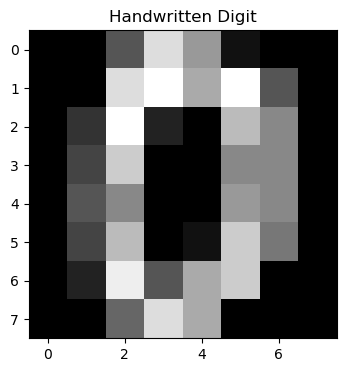

Variance explained by PC1: 0.12
Variance explained by PC2: 0.10
Correlation Matrix between Principal Components:
[[ 1.00000000e+00 -7.00993349e-17]
 [-7.00993349e-17  1.00000000e+00]]


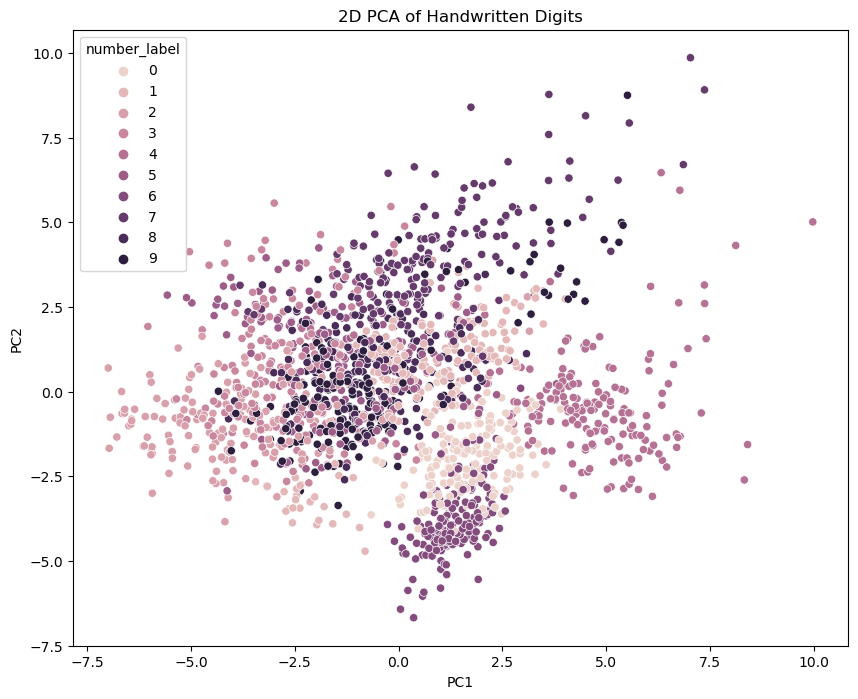

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

digits = pd.read_csv('digits.csv')

pixels = digits.drop('number_label', axis=1)

single_image_row = pixels.iloc[0]

image_array = np.array(single_image_row)

image_matrix = image_array.reshape(8, 8)

plt.figure(figsize=(4, 4))
plt.imshow(image_matrix, cmap='gray')  
plt.title("Handwritten Digit")
plt.show()

scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(pixels_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance_ratio[0]:.2f}")
print(f"Variance explained by PC2: {explained_variance_ratio[1]:.2f}")
pc_correlation_matrix = np.corrcoef(pca_result.T)
print(f"Correlation Matrix between Principal Components:\n{pc_correlation_matrix}")


pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['number_label'] = digits['number_label']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='number_label', data=pca_df, legend='full')
plt.title('2D PCA of Handwritten Digits')
plt.show()

# TASK:


In [ ]:
# Imagine you're working as a data scientist for a retail company that operates in multiple regions. 
# The company has provided you with a large dataset containing information about customer purchases, 
# including product categories, purchase frequency, and customer demographics.

# Your task is to analyze this dataset using Pandas and Numpy to clean and preprocess the data, 
# then use data visualization techniques with Matplotlib and Seaborn to explore the correlations and patterns within the dataset.

# However, during the exploration, you notice that there's a discrepancy in the dataset where some purchases seem to be wrongly 
# categorized, and there are missing values in crucial columns.

# Once the data is cleaned and visualized, your next objective is to implement a recommendation system using K Nearest Neighbours
# (KNN) to suggest similar products to customers based on their purchase history and demographics.

# Furthermore, the company wants you to segment their customers into distinct groups for targeted marketing strategies. 
# You decide to employ K-Means Clustering to categorize customers based on their purchasing behavior and demographics.

# Just when you're about to present your findings to the management, you realize that the dataset is extremely high-dimensional 
# and may contain redundant features. To enhance your presentation and improve computational efficiency, y
# ou plan to use Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining as much variance 
# as possible.

# Can you outline the specific steps you would take to address the data discrepancies,
# perform the necessary preprocessing, visualize the data effectively, implement the recommendation system using KNN, 
# segment customers with K-Means Clustering, and employ PCA to streamline your analysis?

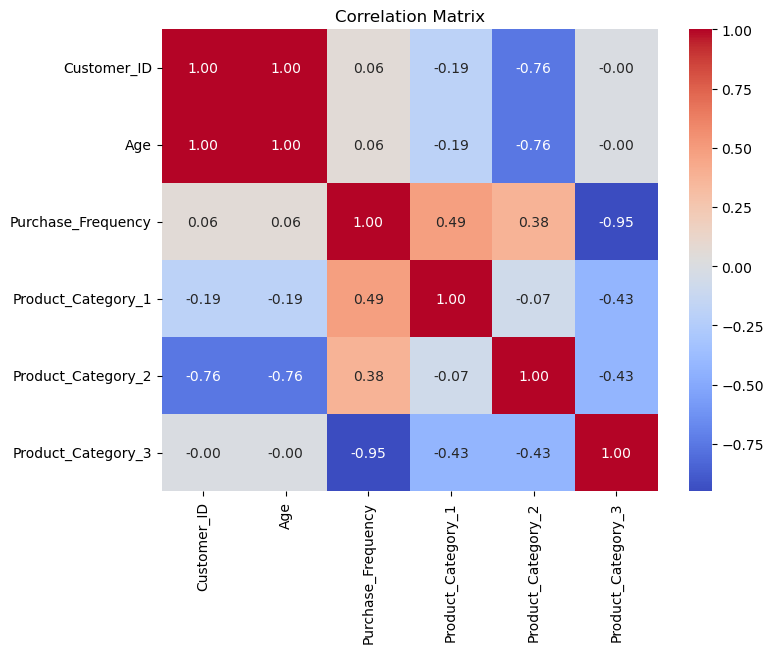

K Nearest Neighbors Indices:
[[0 2]
 [1 2]
 [2 1]
 [3 2]
 [4 2]]


C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RTC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



K-Means Clustering Results:
   Customer_ID  Age  Purchase_Frequency  Product_Category_1  \
0            1   25                  10                   2   
1            2   30                   5                   1   
2            3   35                   8                   3   
3            4   40                  12                   2   
4            5   45                   7                   1   

   Product_Category_2  Product_Category_3  Cluster  
0                   3                   1        2  
1                   2                   3        1  
2                   1                   2        1  
3                   2                   1        0  
4                   1                   2        1  

PCA Components:
        PC1       PC2
0 -0.531835  1.468165
1 -1.494850 -0.494850
2 -0.117041 -0.117041
3  1.553370  0.553370
4  0.590356 -1.409644


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# Creating a sample dataset using a dictionary
data = {
    'Customer_ID': [1, 2, 3, 4, 5],
    'Age': [25, 30, 35, 40, 45],
    'Purchase_Frequency': [10, 5, 8, 12, 7],
    'Product_Category_1': [2, 1, 3, 2, 1],
    'Product_Category_2': [3, 2, 1, 2, 1],
    'Product_Category_3': [1, 3, 2, 1, 2]
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Recommendation System using K Nearest Neighbours (KNN)
features = ['Age', 'Purchase_Frequency']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn = NearestNeighbors(n_neighbors=2)
knn.fit(X_scaled)
distances, indices = knn.kneighbors(X_scaled)
print("K Nearest Neighbors Indices:")
print(indices)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("\nK-Means Clustering Results:")
print(df)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("\nPCA Components:")
print(principal_df.head())
